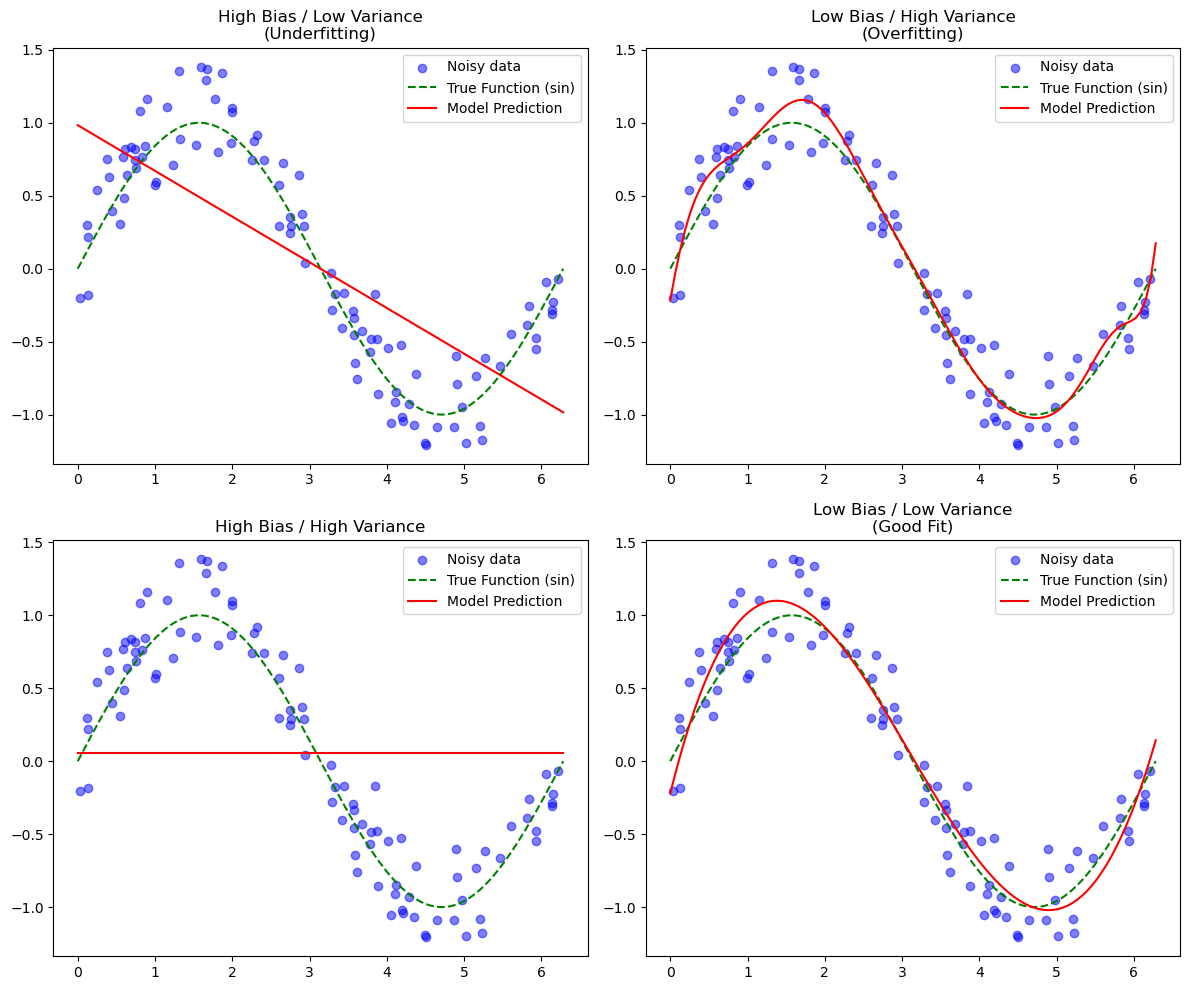

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generate synthetic data
np.random.seed(0)
X = np.sort(np.random.rand(100, 1) * 2 * np.pi, axis=0)
y_true = np.sin(X).ravel()
y = y_true + np.random.normal(0, 0.2, size=y_true.shape)

# X values for plotting predictions
X_plot = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

# Models for each scenario
models = {
    "High Bias / Low Variance\n(Underfitting)": make_pipeline(PolynomialFeatures(1), LinearRegression()),
    "Low Bias / High Variance\n(Overfitting)": make_pipeline(PolynomialFeatures(15), LinearRegression()),
    "High Bias / High Variance": make_pipeline(PolynomialFeatures(0), LinearRegression()),  # Essentially a constant model
    "Low Bias / Low Variance\n(Good Fit)": make_pipeline(PolynomialFeatures(4), LinearRegression())
}

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for ax, (title, model) in zip(axes, models.items()):
    model.fit(X, y)
    y_pred = model.predict(X_plot)
    
    ax.scatter(X, y, color='blue', label='Noisy data', alpha=0.5)
    ax.plot(X_plot, np.sin(X_plot), color='green', linestyle='--', label='True Function (sin)')
    ax.plot(X_plot, y_pred, color='red', label='Model Prediction')
    ax.set_title(title)
    ax.legend()

plt.tight_layout()
plt.show()


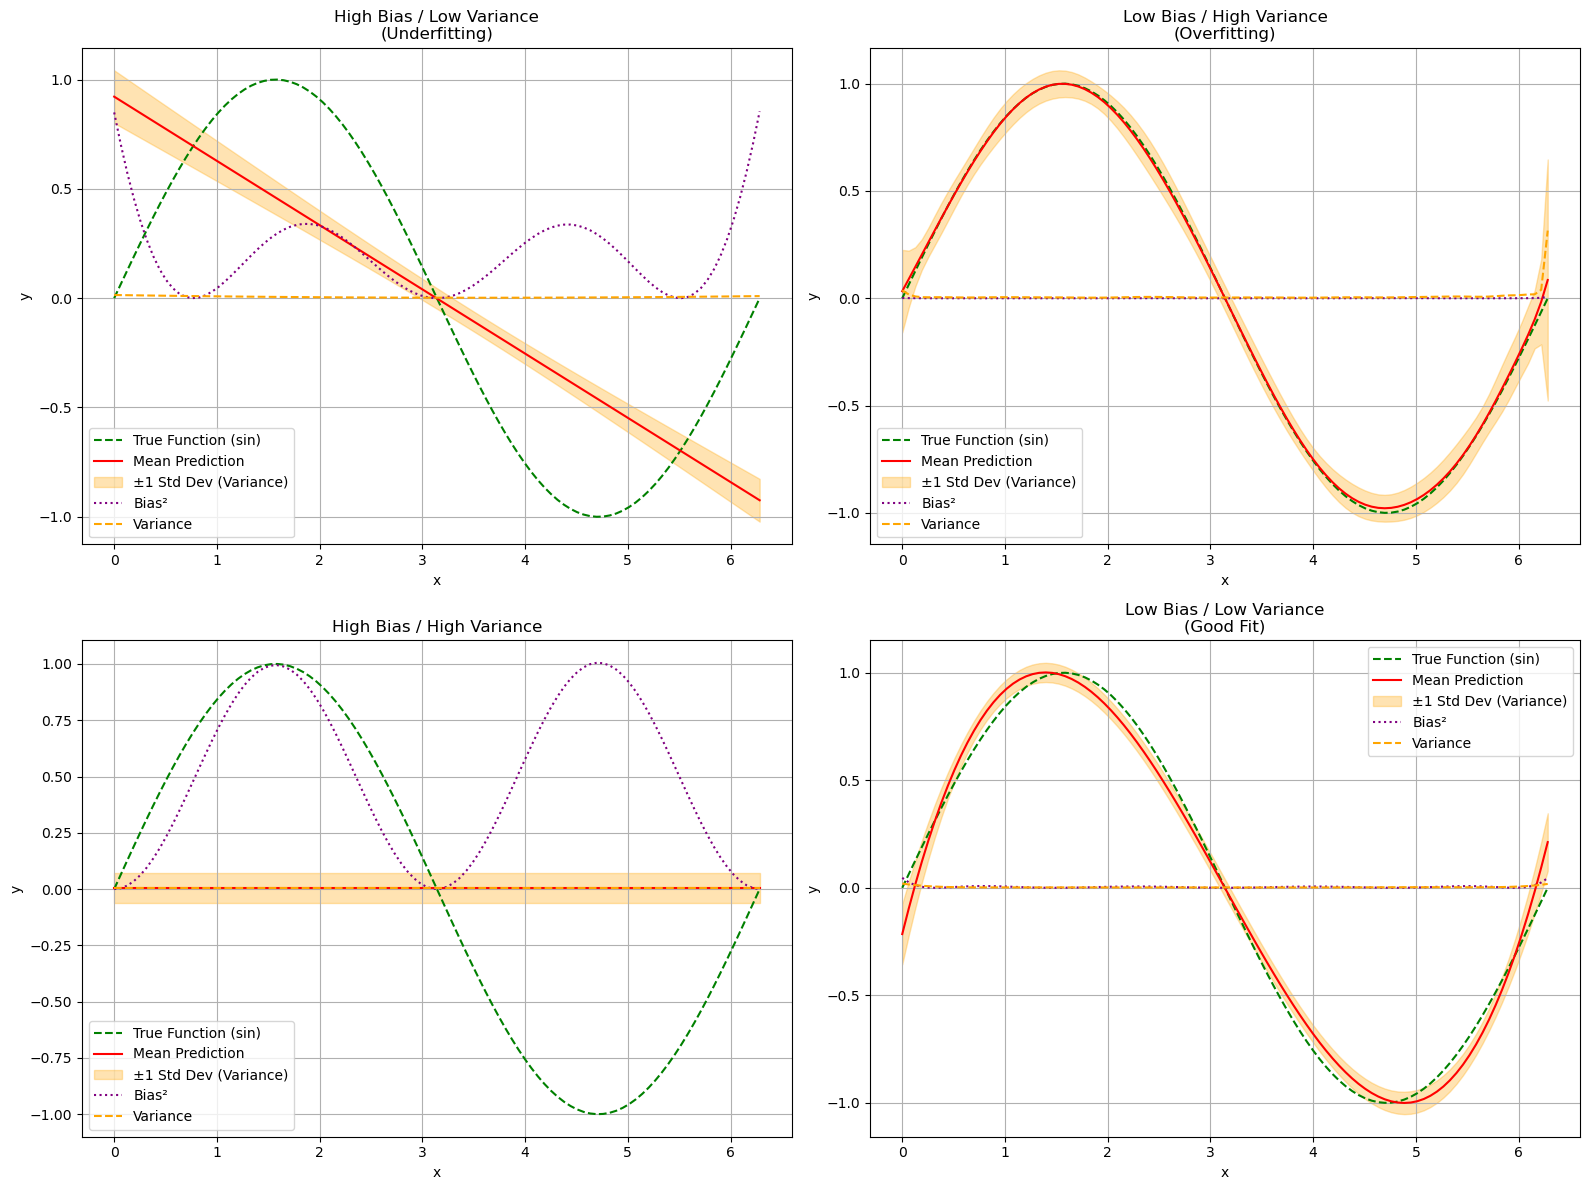

In [4]:
# Define degrees and labels for the four scenarios
scenarios = {
    "High Bias / Low Variance\n(Underfitting)": 1,
    "Low Bias / High Variance\n(Overfitting)": 15,
    "High Bias / High Variance": 0,  # Constant model
    "Low Bias / Low Variance\n(Good Fit)": 4
}

# Initialize plot
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

# Generate synthetic data function
def generate_data(n=100, noise_std=0.2):
    X = np.sort(np.random.rand(n, 1) * 2 * np.pi, axis=0)
    y = np.sin(X).ravel() + np.random.normal(0, noise_std, size=n)
    return X, y

# Loop through each scenario
for ax, (title, degree) in zip(axes, scenarios.items()):
    predictions = []
    
    for _ in range(n_models):
        X_train, y_train = generate_data()
        
        if degree == 0:
            # Constant model
            model = make_pipeline(PolynomialFeatures(0), LinearRegression())
        else:
            model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_plot)
        predictions.append(y_pred)

    predictions = np.array(predictions)
    mean_prediction = np.mean(predictions, axis=0)
    true_function = np.sin(X_plot).ravel()
    bias_squared = (mean_prediction - true_function) ** 2
    variance = np.var(predictions, axis=0)
    
    # Plot components
    ax.plot(X_plot, true_function, label='True Function (sin)', linestyle='--', color='green')
    ax.plot(X_plot, mean_prediction, label='Mean Prediction', color='red')
    ax.fill_between(X_plot.ravel(), mean_prediction - np.sqrt(variance), mean_prediction + np.sqrt(variance),
                    color='orange', alpha=0.3, label='±1 Std Dev (Variance)')
    ax.plot(X_plot, bias_squared, label='Bias²', color='purple', linestyle=':')
    ax.plot(X_plot, variance, label='Variance', color='orange', linestyle='--')
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()